Important relations among different columns in the dataframe above:
    
#### These relations are analyzed regardless of the existing rate at the country level (everything will be examined globally)"
- distribution of suicide between different age range for males in different years 
- compare this distribution with that of women 
- how HDI (Human Development Index) can affect the suicide rate?

    `Make inference`

#### These relations are analyzed at the country level"

- which countries show more suicide rate among different genders?
    
    `Requires another CSV file to be downloaded`

- barplot for countries cmparing the rate between the youngest and oldest age range 



In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv('./master.csv')
#remove gdp for year column
#print(list(df))
df = df.drop([' gdp_for_year ($) ','HDI for year'], axis=1)
print('The number of training examples before dropna: ', len(df))
df = df.dropna()
print('The number of training examples after dropna: ', len(df))
print('Total number of features: ', len(df.columns))
df.head()

The number of training examples before dropna:  27820
The number of training examples after dropna:  27820
Total number of features:  10


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,796,Boomers


In [12]:
for i in df.columns:
    print(i, '------', df[i].dtype)

country ------ object
year ------ int64
sex ------ object
age ------ object
suicides_no ------ int64
population ------ int64
suicides/100k pop ------ float64
country-year ------ object
gdp_per_capita ($) ------ int64
generation ------ object


In [13]:
for col in df.columns:
    print('Number of unique {}:'.format(col), len(np.unique(df[col])))

Number of unique country: 101
Number of unique year: 32
Number of unique sex: 2
Number of unique age: 6
Number of unique suicides_no: 2084
Number of unique population: 25564
Number of unique suicides/100k pop: 5298
Number of unique country-year: 2321
Number of unique gdp_per_capita ($): 2233
Number of unique generation: 6


In [14]:
cont = pd.read_csv('./countryContinent.csv',encoding = "ISO-8859-1")

FileNotFoundError: [Errno 2] No such file or directory: './countryContinent.csv'

In [ ]:
def suicide_gender_year(df, gender):
    
    df2 = df[df['sex'] == gender]
    dict = {}
    count =  np.array(df2['suicides_no'])
    for ind, y in enumerate(df2['year']):
        if y not in dict:
            dict[y] = 0
            dict[y] += count[ind]
        else:
            dict[y] += count[ind]
            
    
    lists = list(dict.items())
    x,y = zip(*lists)
    plt.bar(x,y)
    plt.title('{} Suicide Rate over different Years'.format(gender))
    plt.xlabel('Year')
    plt.ylabel('counts')
    plt.grid(True)
    plt.show()
    

In [15]:
def plot_population(frame, country):
    reduced  = frame.where(frame['country'] == country)
    reduced = reduced.dropna()
    dict = {}
    population = np.array(reduced['population'])
    for ind, year in enumerate(reduced['year']):
        if year not in dict:
            dict[year] = 0
            dict[year] += population[ind]
        else:
            dict[year] += population[ind]
    lists = list(dict.items())
    x,y = zip(*lists)
    plt.plot(x,y)
    plt.title('Poplutation vs Year in {}'.format(country))
    plt.xlabel('Year')
    plt.ylabel('Population')
    plt.grid(True)
    plt.show()
    

In [16]:
def barplot(frame, col_x, col_y, country):
    reduced  = frame.where(frame['country'] == country)
    reduced = reduced.dropna()
    x_axis = reduced[col_x]
    y_axis = np.array(reduced[col_y])
    print('Number of data: ',len(y_axis))
    dict = {}
    for ind , val in enumerate(x_axis):
        if val not in dict:
            dict[val] = 0
            dict[val] += y_axis[ind]
        else:
            dict[val] += y_axis[ind]
    
    lists = list(dict.items())
    x,y = zip(*lists)
    x = list(x)
    y = list(y)
   

    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.bar(x,y)
    plt.title('{} vs. {} in {}'.format(col_y, col_x, country))
    plt.xlabel(col_x)
    plt.ylabel(col_y)
    plt.grid(True)
    plt.show()

In [17]:
list = []
count_list = []
for country in df['country']:
    if country not in count_list:
        count_list.append(country)
        if country == 'Saint Vincent and Grenadines':
            country = 'Saint Vincent and the Grenadines'
        elif country == 'United Kingdom':
            country = 'United Kingdom of Great Britain and Northern Ireland'
        elif country == 'United States':
            country = 'United States of America'
        list.append(cont[cont['country'] == country].continent.to_list()[0])

cont_dict = {}         
for i in range(len(count_list)):   
    cont_dict[count_list[i]] = list[i]


new_col = pd.DataFrame()
new_col['continent'] = df['country']
new_col = new_col.replace({"continent": cont_dict})

new_df = pd.concat((new_col, df), axis=1)
new_df.head()

NameError: name 'cont' is not defined

In [18]:
cont_list = []
count_list = []
for cont in np.unique(new_df['continent']):
    cont_list.append(cont)
    count_list.append(np.sum(new_df[new_df['continent']== cont].suicides_no))
plt.bar(cont_list, count_list)
plt.title('Total Suicide Count in all Continents Through 1985-2016')
plt.ylabel('Counts')
plt.show()

NameError: name 'new_df' is not defined

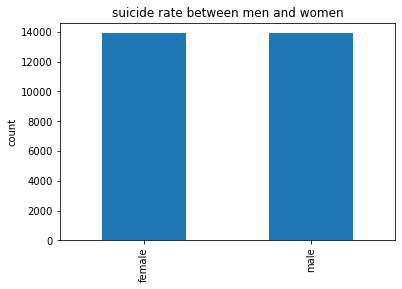

13910 male
13910 female


In [19]:
df['sex'].value_counts().plot(kind = 'bar')
plt.title('suicide rate between men and women')
plt.ylabel('count')
plt.show()
print(np.sum(df['sex'] == 'male'),'male')
print(np.sum(df['sex'] == 'female'),'female')


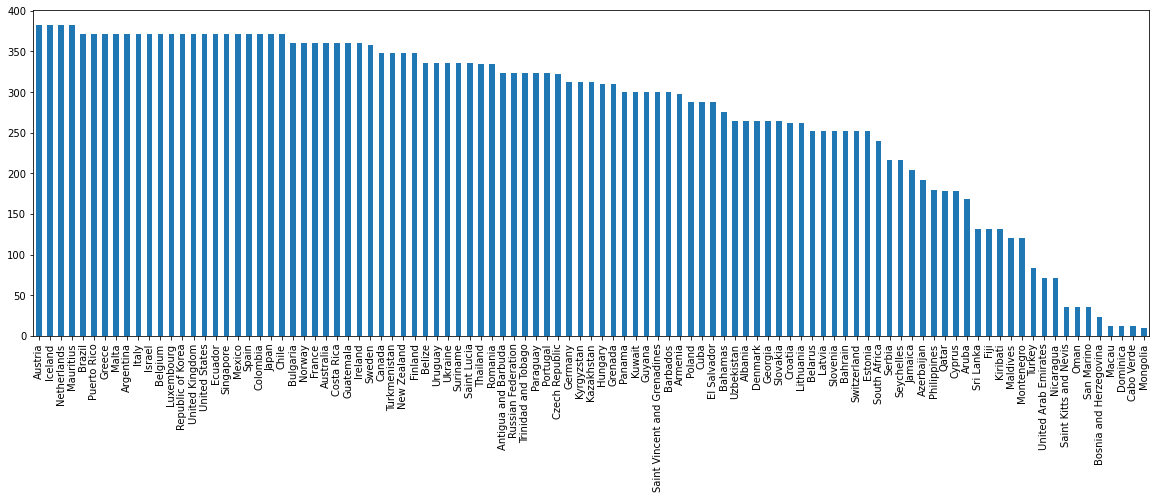

In [20]:
fig = plt.figure(figsize=(20,6))
df['country'].value_counts().plot(kind='bar')
plt.show()

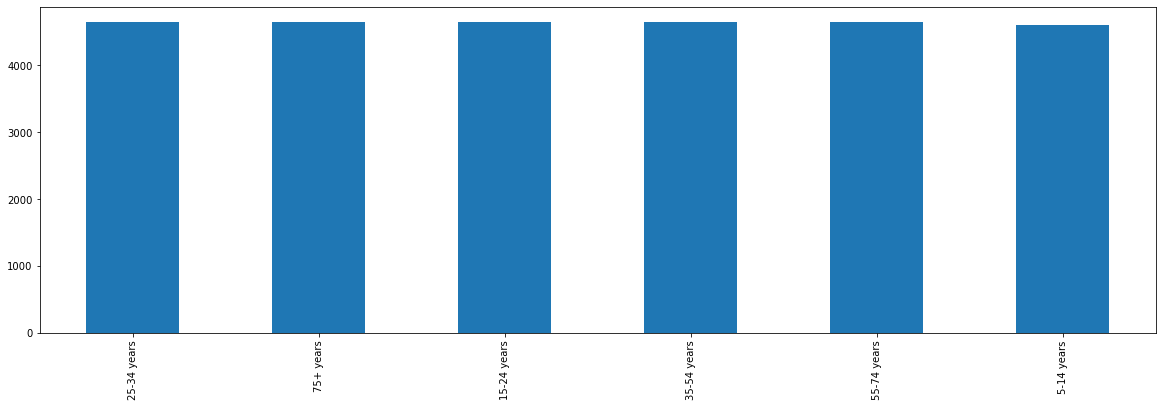

In [21]:
fig = plt.figure(figsize=(20,6))
df['age'].value_counts().plot(kind='bar')
plt.show()

In [22]:
plot_population(df, 'Albania')

TypeError: 'list' object is not callable

In [ ]:
barplot(df, 'year', 'HDI for year', 'Iceland')

In [ ]:
suicide_gender_year(df, 'male')

In [23]:
#fig = plt.figure(figsize=(20,6))
aggregation_functions = {'suicides_no': 'sum'}
df_age = df.groupby(df['age']).aggregate(aggregation_functions)
df_age.head(6)

#df_new.plot(x="sex", y="age", kind="bar")
#plt.show()

,suicides_no
age,
15-24 years,808542
25-34 years,1123912
35-54 years,2452141
5-14 years,52264
55-74 years,1658443
75+ years,653118


In [24]:
df_sex = df.groupby(df['sex']).aggregate(aggregation_functions)
df_sex.head()

,suicides_no
sex,
female,1559510
male,5188910


In [25]:
df_multiple = df.groupby(['age', 'sex']).agg(aggregation_functions)
df_multiple = df_multiple.reset_index()
#a, b = df_multiple.iloc[0].copy(), df_multiple.iloc[1].copy()
#df_multiple.iloc[0],df_multiple.iloc[1] = b,a


'''
df_multiple["new"] = range(1,len(df_multiple)+1)
df_multiple.ix[6,'new'] = 0
df_multiple.sort_values("new").drop('new', axis=1)
df_multiple.sort_values("new").reset_index(drop='True').drop('new', axis=1)

df_multiple.ix[7,'new'] = 0
df_multiple.sort_values("new").drop('new', axis=1)
df_multiple.sort_values("new").reset_index(drop='True').drop('new', axis=1)
'''
df_multiple.head(12)


,age,sex,suicides_no
0,15-24 years,female,175437
1,15-24 years,male,633105
2,25-34 years,female,208823
3,25-34 years,male,915089
4,35-54 years,female,506233
5,35-54 years,male,1945908
6,5-14 years,female,16997
7,5-14 years,male,35267
8,55-74 years,female,430036
9,55-74 years,male,1228407


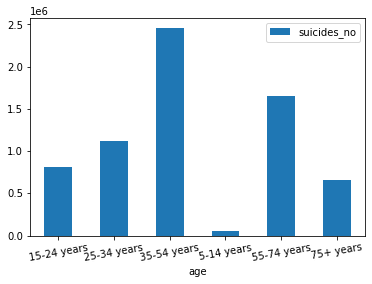

In [26]:

ax = df_age.plot.bar(rot=10)

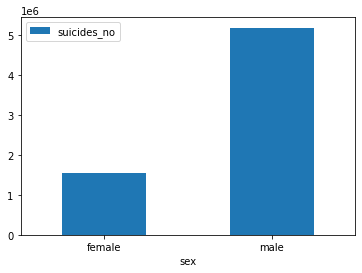

In [27]:
ax = df_sex.plot.bar(rot=0)

Text(0, 0.5, 'Number of Suicides')

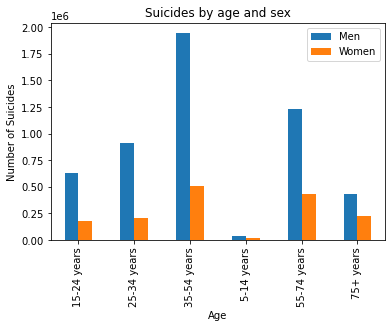

In [28]:
list_men, list_women = [],[]
for i in range(len(df_multiple)):
    if i%2:
        list_men.append(df_multiple.values[i][2])
    else:
        list_women.append(df_multiple.values[i][2])
        
plotdata = pd.DataFrame({
    "Men":list_men,
    "Women":list_women,
    
    }, 
    index=df_age.index.tolist()
)
plotdata.plot(kind="bar")
plt.title("Suicides by age and sex")
plt.xlabel("Age")
plt.ylabel("Number of Suicides")

<AxesSubplot:xlabel='year'>

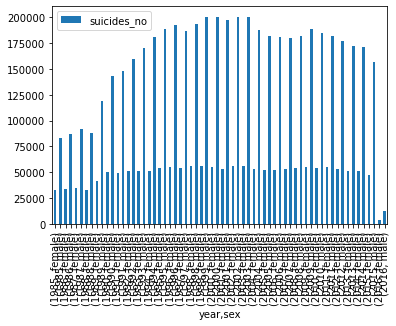

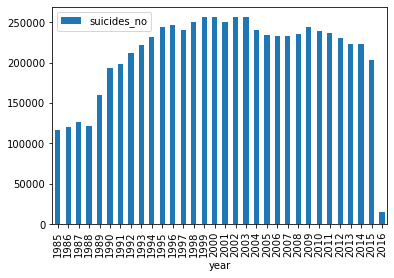

In [29]:
aggregation_functions = {'suicides_no': 'sum'}

df_yr_sex = df.groupby(['year', 'sex']).agg(aggregation_functions)
df_yr = df.groupby(df['year']).aggregate(aggregation_functions)

df_yr_sex.plot(kind="bar")
df_yr.plot(kind="bar")

In [30]:
df_yr

,suicides_no
year,
1985,116063
1986,120670
1987,126842
1988,121026
1989,160244
1990,193361
1991,198020
1992,211473
1993,221565
